<a href="https://colab.research.google.com/github/DPatt365/Project_2/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Import/Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

filename = '/content/healthcare-dataset-stroke-data.csv'

df = pd.read_csv(filename)

In [2]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##Data Cleaning

In [4]:
#check for duplicates
df.duplicated().sum()

0

In [5]:
#Dropping 'id' column because it serves no purpose in our model or analysis
df.drop(columns='id', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


BMI column is missing data. we will have to impute for our visualizations.

In [7]:
#Search for na values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [23]:
#Checking categorical columns for inadequate data and dropping the category

df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [21]:
df.index[df['gender']=='Other']

Int64Index([3116], dtype='int64')

In [22]:
df.drop(3116, inplace=True)

In [38]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Name: work_type, dtype: int64

In [37]:
df.drop(df.loc[df.work_type=='Never_worked'].index, inplace=True)

In [26]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [27]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

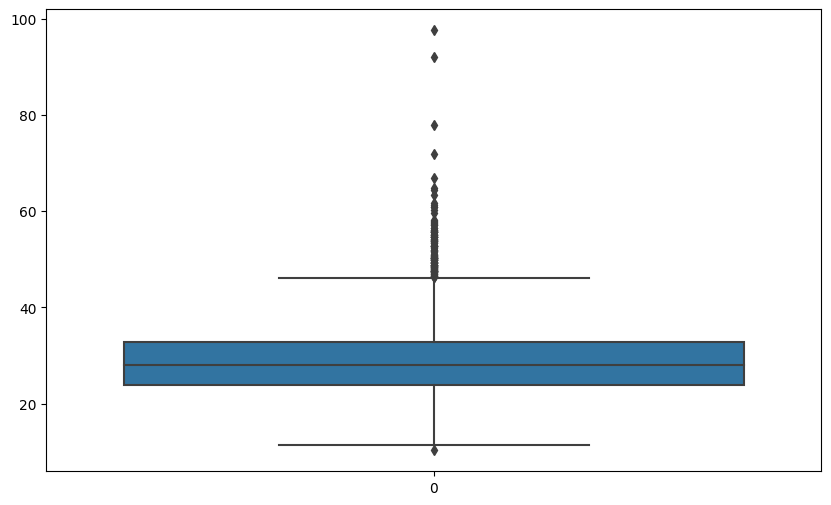

In [39]:
#checking distribution to determine imputation strategy
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(df.bmi);

I will impute using the median because of the large amount of outliers. median imputation will be less sensitive.

In [40]:
#Filling na values with median
item_median = df['bmi'].median()
df['bmi'].fillna(item_median, inplace=True)
df.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5087 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5087 non-null   object 
 1   age                5087 non-null   float64
 2   hypertension       5087 non-null   int64  
 3   heart_disease      5087 non-null   int64  
 4   ever_married       5087 non-null   object 
 5   work_type          5087 non-null   object 
 6   Residence_type     5087 non-null   object 
 7   avg_glucose_level  5087 non-null   float64
 8   bmi                5087 non-null   float64
 9   smoking_status     5087 non-null   object 
 10  stroke             5087 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 605.9+ KB


In [41]:
#checking for odd entries
for v in df.columns:
  print(df[v].value_counts())

Female    2983
Male      2104
Name: gender, dtype: int64
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
0    4589
1     498
Name: hypertension, dtype: int64
0    4811
1     276
Name: heart_disease, dtype: int64
Yes    3353
No     1734
Name: ever_married, dtype: int64
Private          2924
Self-employed     819
children          687
Govt_job          657
Name: work_type, dtype: int64
Urban    2581
Rural    2506
Name: Residence_type, dtype: int64
93.88     6
84.10     5
91.85     5
91.68     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3966, dtype: int64
28.1    230
28.7     41
27.6     37
27.7     37
26.7     37
       ... 
51.8      1
13.4      1
56.0      1
10.3      1
14.9      1
Name: bmi, Length: 418, dtype: int64
never smoked       1878
Unknown            1536
formerly smoked  

##Univariate Visualizations

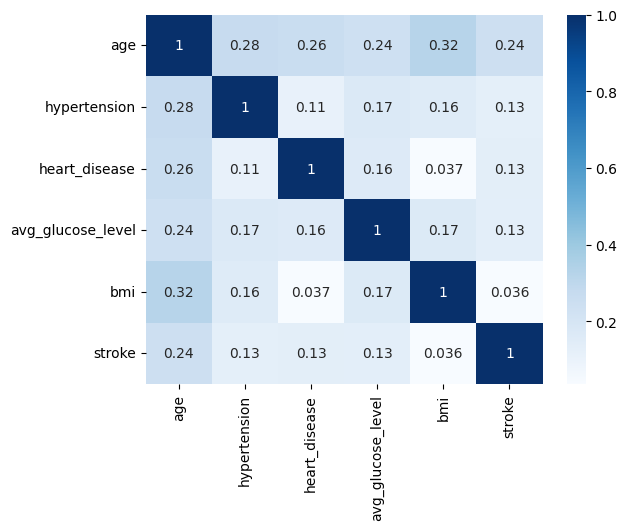

In [42]:
corr = df.corr()
sns.heatmap(corr, cmap='Blues', annot=True);

The age feature has some descent correlations, especially with bmi and hypertension. The rest of the coorelations are unfavorable.

In [43]:
import plotly.express as px

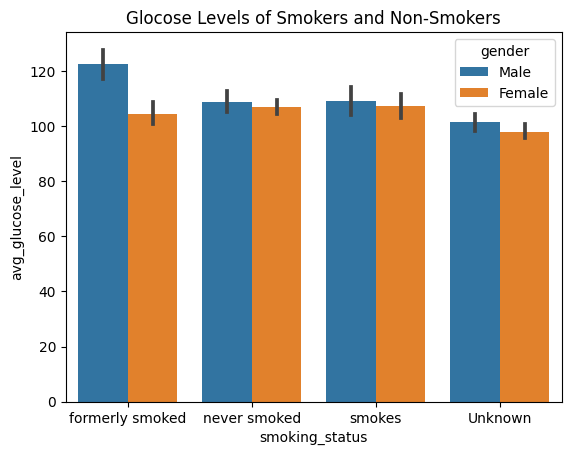

In [58]:
sns.barplot(x='smoking_status', y='avg_glucose_level', 
            data=df,
            hue='gender').set(title = 'Glocose Levels of Smokers and Non-Smokers' 
           );

In [45]:
#Looking for outliers in continuous columns
fig = px.box(df, x="gender", y="avg_glucose_level", points="all", title='Gender and Avg Glucose Dist.')
fig.show()

In [48]:
fig = px.box(df, x="gender", y="age", points="all", title='Gender and Age Dist.')
fig.show()

In [49]:
fig = px.box(df, x="gender", y="bmi", points="all", title='Gender and BMI Dist.')
fig.show()

In [46]:
px.bar(df, x='heart_disease', y='work_type', color='stroke')

The privte work type has a high number of patients with heart disease, but stroke has no coorelation.

In [16]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


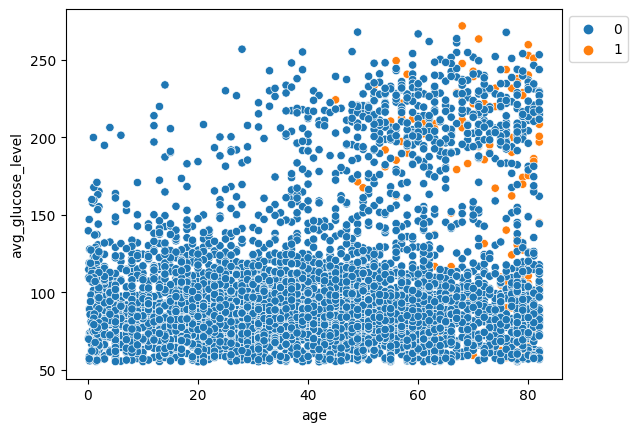

In [47]:
ax = sns.scatterplot(data = df, x = 'age', y = 'avg_glucose_level', hue = 'stroke');
ax.legend(bbox_to_anchor = [1, 1]);

Looking at the scatterplot above I can conclude that patients 40 years old and up are at higher risk of stroke. However, there is no real coorelation between glucose level and age.